In [1]:
from database.market import Market
from database.strategy import Strategy
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
market = Market()
strategy = Strategy()

In [3]:
strategy.connect()
trades = strategy.retrieve("quarterly_trades")
strategy.disconnect()

In [4]:
t= trades.drop("_id",axis=1)

In [5]:
t["seat"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [6]:
trades

,_id,year,quarter,week,date,ticker,adjClose,quarterly_price_regression_prediction,score,quarterly_delta,sell_date,sell_price,delta,d,qcty,qmty,value,seat
0,6162ddd6d88a05ae89a43289,2019,1,1,2019-01-02,NWSA,10.958357,98.621498,60,7.999661,2019-01-04,11.323956,0.033363,0,1,1,True,0
1,6162ddd6d88a05ae89a4328a,2019,1,1,2019-01-02,NLOK,10.545500,73.815702,60,5.999735,2019-01-07,10.762646,0.020591,0,1,1,True,1
2,6162ddd7d88a05ae89a4328b,2019,1,1,2019-01-02,DISCA,25.830000,127.210815,60,3.924925,2019-01-09,27.280000,0.056136,0,1,1,True,2
3,6162ddd7d88a05ae89a4328c,2019,1,1,2019-01-02,TWTR,28.810000,125.032890,60,3.339913,2019-01-11,32.870000,0.140923,0,1,1,True,3
4,6162ddd7d88a05ae89a4328d,2019,1,1,2019-01-02,JCI,28.558489,121.143664,60,3.241949,2019-01-14,30.309452,0.061311,0,1,1,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,6162e5bbd88a05ae89a44c59,2019,1,1,2019-01-02,BKNG,1721.700000,544.252014,80,0.683887,2020-12-31,2227.270000,0.293646,10,4,5,False,1
6609,6162e5bbd88a05ae89a44c5a,2019,1,1,2019-01-02,AVGO,228.109377,78.556458,80,0.655619,2021-10-01,487.350000,1.136475,10,4,5,False,2
6610,6162e5bdd88a05ae89a44c5b,2019,1,1,2019-01-02,BKNG,1721.700000,244.487610,90,0.857996,2019-12-31,2053.730000,0.192850,10,4,5,False,0
6611,6162e5bed88a05ae89a44c5c,2019,1,1,2019-01-02,BKNG,1721.700000,544.252014,90,0.683887,2020-12-31,2227.270000,0.293646,10,4,5,False,1


In [277]:
a = []
seats = 5
for number_of_training_weeks in tqdm(range(14,69,14)):
    for weekly_model_training_year in tqdm(range(1,6)):
        for weekly_category_training_year in tqdm(range(1,5)):
            for delta in tqdm(range(0,15,5)):
                d = delta/100
                for what in range(2):
                    value = what == 1 
                    for score in tqdm(range(60,100,10)):
                        try:
                            score_trades = t[(t["score"]==score) & 
                                             (t["d"]==d) & 
                                            (t["wcty"]==weekly_category_training_year) & 
                                             (t["wmty"]==weekly_model_training_year) &
                                            (t["tw"]==number_of_training_weeks) &
                                            (t["value"]==value)]
                            cash = []
                            for seat in range(seats):
                                initial = float(100 / seats)
                                seat_trades = score_trades[score_trades["seat"]==seat]
                                for delta in seat_trades["delta"]:
                                    initial = initial * (1+delta)
                                    cash.append(initial)
                                analysis = {}
                                analysis["score"] = score
                                analysis["trades"] = seat_trades.index.size
                                if seat_trades.index.size > 0:
                                    analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
                                    seat_trades["hpr"] = (seat_trades["sell_date"] - seat_trades["date"])
                                    seat_trades["hpr"] =[x.days for x in seat_trades["hpr"]]
                                    analysis["hpr"] = seat_trades["hpr"].mean()
                                    analysis["seat"] = seat
                                    analysis["d"] = d
                                    analysis["wcty"] = weekly_category_training_year
                                    analysis["wmty"] = weekly_model_training_year
                                    analysis["tw"] = number_of_training_weeks
                                    analysis["value"] = value
                                    analysis["pv"] = initial
                                    a.append(analysis)
                        except Exception as e:
                            print(str(e))
                            continue

  0%|                                                           | 0/5 [00:00<?, ?it/s]

  0%|                                                           | 0/4 [00:00<?, ?it/s]


  0%|                                                           | 0/3 [00:00<?, ?it/s]



  0%|                                                           | 0/4 [00:00<?, ?it/s]C:\Users\ericj\AppData\Local\Temp/ipykernel_14128/4040487256.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 41.18it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 42.54it/s]



 33%|█████████████████                                  | 1/3 [00:00<00:00,  5.18it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 67.78it/s]




100%|█████████████████████████████████████

100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.06it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.06it/s]



100%|███████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.39it/s]


 50%|█████████████████████████▌                         | 2/4 [00:00<00:00,  2.38it/s]


  0%|                                                           | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.43it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 45.44it/s]



 33%|█████████████████                                  | 1/3 [00:00<00:00,  5.52it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.05it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.71it/s]



 67%|██████████████████████████████████                 | 2/3 [00:00<00:00,  7.06it/s]



100%|████

100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.71it/s]



100%|███████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.24it/s]


100%|███████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.37it/s]

 40%|████████████████████▍                              | 2/5 [00:03<00:05,  1.69s/it]

  0%|                                                           | 0/4 [00:00<?, ?it/s]


  0%|                                                           | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.43it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 45.44it/s]



 33%|█████████████████                                  | 1/3 [00:00<00:00,  5.52it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.71it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 70.16it/s]



 67%|█████████

100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.06it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.06it/s]



100%|███████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.04it/s]


 50%|█████████████████████████▌                         | 2/4 [00:00<00:00,  2.38it/s]


  0%|                                                           | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.93it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.93it/s]



 33%|█████████████████                                  | 1/3 [00:00<00:00,  5.52it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.71it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.71it/s]



 67%|██████████████████████████████████                 | 2/3 [00:00<00:00,  7.09it/s]



100%|████

100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.06it/s]



100%|███████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.99it/s]


100%|███████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.34it/s]

 80%|████████████████████████████████████████▊          | 4/5 [00:06<00:01,  1.72s/it]

  0%|                                                           | 0/4 [00:00<?, ?it/s]


  0%|                                                           | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 47.05it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 47.61it/s]



 33%|█████████████████                                  | 1/3 [00:00<00:00,  5.78it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.71it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.06it/s]



 67%|█████████

100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 66.65it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 66.65it/s]



100%|███████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.98it/s]


 50%|█████████████████████████▌                         | 2/4 [00:00<00:00,  2.36it/s]


  0%|                                                           | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.43it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.43it/s]



 33%|█████████████████                                  | 1/3 [00:00<00:00,  5.49it/s]



100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.71it/s]




100%|███████████████████████████████████████████████████| 4/4 [00:00<00:00, 74.06it/s]



 67%|██████████████████████████████████                 | 2/3 [00:00<00:00,  7.04it/s]



100%|████

In [7]:
a = []
seats = 10
for quarterly_category_training_year in tqdm(range(1,5)):
    for quarterly_model_training_year in tqdm(range(1,6)):
        for required in tqdm(range(0,15,5)):
            d = float(required/100)
            for what in range(2):
                value = what == 1 
                for score in tqdm(range(60,100,10)):
                    try:
                        score_trades = t[(t["score"]==score) & 
                                         (t["d"]==required) & 
                                        (t["qcty"]==quarterly_category_training_year) & 
                                         (t["qmty"]==quarterly_model_training_year) &
                                        (t["value"]==value)]
                        cash = []
                        for seat in range(seats):
                            initial = float(100 / seats)
                            seat_trades = score_trades[score_trades["seat"]==seat]
                            for delta in seat_trades["delta"]:
                                initial = initial * (1+delta)
                                cash.append(initial)
                            analysis = {}
                            analysis["score"] = score
                            analysis["trades"] = seat_trades.index.size
                            if seat_trades.index.size > 0:
                                analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
                                seat_trades["hpr"] = (seat_trades["sell_date"] - seat_trades["date"])
                                seat_trades["hpr"] =[x.days for x in seat_trades["hpr"]]
                                analysis["hpr"] = seat_trades["hpr"].mean()
                                analysis["seat"] = seat
                                analysis["d"] = required
                                analysis["qcty"] = quarterly_category_training_year
                                analysis["qmty"] = quarterly_model_training_year
                                analysis["value"] = value
                                analysis["pv"] = initial
                                a.append(analysis)
                    except Exception as e:
                        print(str(e))
                        continue

  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]C:\Users\ericj\AppData\Local\Temp/ipykernel_7468/3517039794.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 59.68it/s]



100%|████████████████████████████████████████████████████████████████████████

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114.26it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114.26it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114.26it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 133.30it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.83it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 4/5

 40%|█████████████████████████████████████████████████████▏                                                                               | 2/5 [00:00<00:00,  3.86it/s]

  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 60.59it/s]



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 61.52it/s]


 33%|████████████████████████████████████████████▎                                                                                        | 1/3 [00:00<00:00,  7.46it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [0

In [8]:
final = pd.DataFrame(a)

In [9]:
final

,score,trades,winrate,hpr,seat,d,qcty,qmty,value,pv
0,60,4,1.0,2.50,0,0,1,1,False,10.472789
1,60,4,1.0,5.25,1,0,1,1,False,10.977928
2,60,4,1.0,27.50,2,0,1,1,False,11.912889
3,60,4,1.0,35.00,3,0,1,1,False,11.339002
4,60,4,1.0,125.75,4,0,1,1,False,20.985463
...,...,...,...,...,...,...,...,...,...,...
2749,80,1,1.0,729.00,1,10,4,5,True,19.404983
2750,80,1,1.0,1003.00,2,10,4,5,True,13.341627
2751,90,1,1.0,363.00,0,10,4,5,True,11.622055
2752,90,1,1.0,729.00,1,10,4,5,True,19.404983


In [10]:
hl = final.pivot_table(index=[str(x) for x in list(final.columns) if x not in ["seat","hpr","pv","winrate","trades"]],columns="seat",values="pv")

In [11]:
report = final.merge(hl.reset_index(),on=[x for x in list(final.columns) if x not in ["seat","hpr","pv","winrate","trades"]]).drop(["pv","seat"],axis=1).groupby([x for x in list(final.columns) if x not in ["seat","hpr","pv","winrate","trades"]]).mean().reset_index()
report.fillna(100/seats,inplace=True)
report["pv"] = [sum([row[1][x] for x in range(seats)]) for row in report.iterrows()]

In [12]:
report.sort_values("pv",ascending=False).reset_index().head(50)

,index,score,d,qcty,qmty,value,trades,winrate,hpr,0,1,2,3,4,5,6,7,8,9,pv
0,389,90,0,3,5,True,5.4,0.963333,73.646667,10.987606,11.414357,13.242788,10.172691,12.858873,17.644069,13.600656,10.758543,223.016477,255.511156,579.207217
1,387,90,0,3,4,True,5.4,0.963333,73.646667,10.987606,11.414357,13.242788,10.172691,12.858873,17.644069,13.600656,10.758543,223.016477,255.511156,579.207217
2,385,90,0,3,3,True,5.4,0.963333,73.646667,10.987606,11.414357,13.242788,10.172691,12.858873,17.644069,13.600656,10.758543,223.016477,255.511156,579.207217
3,383,90,0,3,2,True,5.1,0.963333,70.740000,9.113697,11.279748,12.600532,12.544034,12.578003,16.950582,13.719931,10.013740,211.613957,240.756981,551.171205
4,381,90,0,3,1,True,4.8,0.960000,79.640000,10.833817,11.112240,12.673156,12.126006,13.710027,17.327669,14.316784,7.495013,202.793208,239.979691,542.367612
5,109,60,10,3,5,True,1.0,1.000000,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,457.708202
6,69,60,5,3,5,True,1.0,1.000000,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,457.708202
7,67,60,5,3,4,True,1.0,1.000000,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,457.708202
8,65,60,5,3,3,True,1.0,1.000000,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,457.708202
9,63,60,5,3,2,True,1.0,1.000000,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,457.708202


In [284]:
report.index.size

480

In [285]:
score = report.sort_values("pv",ascending=False).reset_index().iloc[0]["score"].item()
d = report.sort_values("pv",ascending=False).reset_index().iloc[0]["d"].item()
wcty = report.sort_values("pv",ascending=False).reset_index().iloc[0]["wcty"].item()
wmty = report.sort_values("pv",ascending=False).reset_index().iloc[0]["wmty"].item()
value = report.sort_values("pv",ascending=False).reset_index().iloc[0]["value"].item()
benchmark = t[(t["score"]==score) & (t["d"]==d)
              & (t["wmty"]==wmty) & (t["wcty"]==wcty)
             & (t["value"]==value)]

In [286]:
timelines =[]
for seat in tqdm(range(seats)):
    seat_trades = benchmark[benchmark["seat"]==seat]
    initial = float(100/seats)
    timeline = []
    for row in seat_trades.iterrows():
        initial = initial * (1+row[1]["delta"])
        timeline.append(initial)
    seat_trades["pv"] = timeline
    timelines.append(seat_trades)

100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 33.55it/s]


In [287]:
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()
sp5.rename(columns={"Symbol":"ticker"},inplace=True)
benchmark = benchmark.merge(sp5,on="ticker",how="left")

In [288]:
benchmark.columns

Index(['index', '_id_x', 'date', 'close', 'high', 'low', 'open', 'volume',
       'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash',
       'splitFactor', 'ticker', 'year', 'quarter', 'week', '_id_y',
       'weekly_price_regression_prediction', 'weekly_score', 'cty', 'mty',
       'tw', 'weekly_delta', 'sell_date', 'sell_price', 'delta', 'score', 'd',
       'wcty', 'wmty', 'value', 'seat', '_id', 'Security', 'SEC filings',
       'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location',
       'Date first added', 'CIK', 'Founded'],
      dtype='object')

In [289]:
stuff = pd.concat(timelines).pivot_table(index="date",columns="seat",values="pv").reset_index()
stuff.fillna(method="ffill",inplace=True)
stuff.fillna(100/seats,inplace=True)

In [290]:
stuff["pv"] = [sum([row[1][i] for i in range(seats)]) for row in stuff.iterrows()]
stuff["date"] = pd.to_datetime(stuff["date"])
spindex = pd.read_csv("sp500.csv",sep="\t")
spindex["date"] = pd.to_datetime(spindex["Date"])
spindex["Adj Close**"] = [float(x.replace(",","")) for x in spindex["Adj Close**"]]

In [291]:
viz = stuff.merge(spindex,on="date",how="right")
viz.fillna(method="ffill",inplace=True)
viz.dropna(inplace=True)
viz["year"] = [x.year for x in viz["date"]]
viz = viz[viz["year"] >= 2018]

In [292]:
viz.sort_values("date",ascending=True,inplace=True)

In [293]:
viz["bp"] = [(row[1]["Adj Close**"] - viz.iloc[0]["Adj Close**"]) /viz.iloc[0]["Adj Close**"] for row in viz.iterrows()]
viz["pp"] = [(row[1]["pv"] - viz.iloc[0]["pv"])/viz.iloc[0]["pv"] for row in viz.iterrows()]

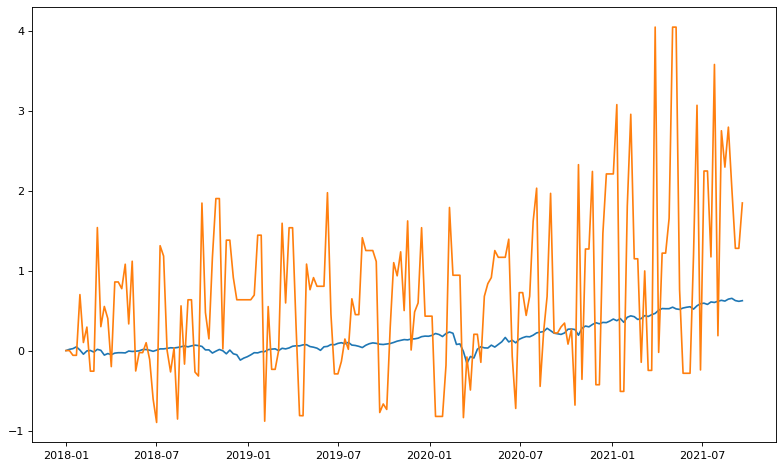

In [294]:
from matplotlib.pyplot import figure
figure(figsize=(12, 7.2), dpi=80)
viz.sort_values("date",inplace=True)
plt.plot(viz["date"],viz["bp"])
plt.plot(viz["date"],viz["pp"])
plt.show()

In [295]:
# industry check
benchmark.groupby(["year","quarter","GICS Sector"]).mean().sort_values("delta",ascending=False).reset_index()[["year","quarter","GICS Sector","delta"]].head(10)

,year,quarter,GICS Sector,delta
0,2018,1,Consumer Discretionary,0.048412
1,2020,3,Consumer Discretionary,0.036210
2,2020,4,Materials,0.034314
3,2020,4,Energy,0.034058
4,2020,2,Materials,0.033444
5,2020,1,Communication Services,0.032326
6,2020,4,Consumer Discretionary,0.031440
7,2020,2,Consumer Staples,0.029622
8,2019,4,Industrials,0.025598
9,2020,2,Information Technology,0.025209


In [296]:
benchmark.sort_values("delta",ascending=False).head(20)[["year","quarter","ticker","adjClose","sell_price","delta","Security","date","sell_date"]]

,year,quarter,ticker,adjClose,sell_price,delta,Security,date,sell_date
1202,2020,1,WHR,61.512500,79.701886,0.295702,Whirlpool Corporation,2020-03-23,2020-03-24
3366,2020,4,VNO,29.265934,37.283471,0.273955,Vornado Realty Trust,2020-11-06,2020-11-09
4636,2020,4,VNO,29.265934,37.283471,0.273955,Vornado Realty Trust,2020-11-06,2020-11-09
2300,2020,4,VNO,29.265934,37.283471,0.273955,Vornado Realty Trust,2020-11-06,2020-11-09
550,2020,1,PENN,7.890000,9.800000,0.242079,Penn National Gaming,2020-03-20,2020-03-23
122,2020,1,NCLH,11.100000,13.750000,0.238739,Norwegian Cruise Line Holdings,2020-03-13,2020-03-24
120,2020,1,MRO,3.571433,4.329010,0.212121,Marathon Oil,2020-03-09,2020-03-10
3954,2020,1,DVN,4.876263,5.903793,0.210721,Devon Energy,2020-03-18,2020-03-19
1411,2020,1,DVN,4.876263,5.903793,0.210721,Devon Energy,2020-03-18,2020-03-19
2684,2020,1,DVN,4.876263,5.903793,0.210721,Devon Energy,2020-03-18,2020-03-19
